me = {'id': 'i9ATG2v6vTso7iQe1RfnNErIzv6oHemUSn8EEbAlhdeOp-Q', 'accountId': 'KLbDr7WrwSpS01JimRBlt_JkF6464n7XDzcafpBxFpJ97g', 'puuid': 'YvTViI0Eg1qN17qF-H2dODu3KwI1NgVb06-VmaHbnIjDTOgKNxKq8ViVwZnINYZp24WEGwUTnam_6Q', 'name': 'satorian', 'profileIconId': 1629, 'revisionDate': 1637292215000, 'summonerLevel': 131}
versions =  {'n': {'item': '11.23.1', 'rune': '7.23.1', 'mastery': '7.23.1', 'summoner': '11.23.1', 'champion': '11.23.1', 'profileicon': '11.23.1', 'map': '11.23.1', 'language': '11.23.1', 'sticker': '11.23.1'}, 'v': '11.23.1', 'l': 'en_US', 'cdn': 'https://ddragon.leagueoflegends.com/cdn', 'dd': '11.23.1', 'lg': '11.23.1', 'css': '11.23.1', 'profileiconmax': 28, 'store': None}
HERE1
HERE1
HERE1
HERE1
HERE1
HERE1
HERE1
HERE1
HERE1
HERE1
   Total Damage  Gold  Victory
0           0.0   0.0      0.0
1           0.0   0.0      0.0
2           0.0   0.0      0.0
3           0.0   0.0      0.0
4           0.0   0.0      0.0
5           0.0   0.0      0.0
6           0.0   0.0      0

/Users/danielmoran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/danielmoran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/danielmoran/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


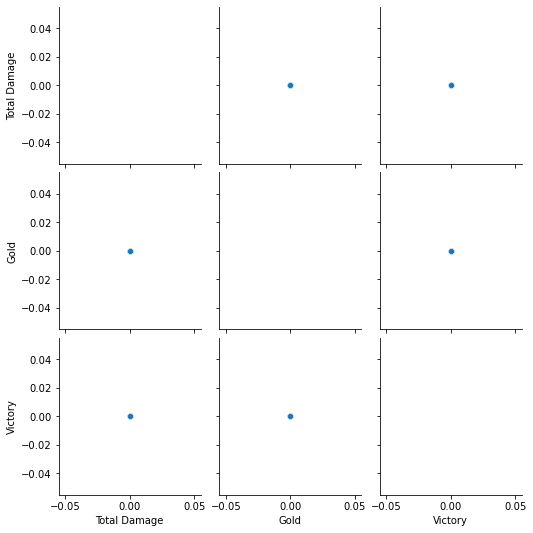

In [20]:
from riotwatcher import LolWatcher, ApiError
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import pandas as pd
import seaborn as sns
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

lw = LolWatcher('RGAPI-6dc124f7-2312-4f76-95ce-6a4e555503b4')

my_region = 'na1'


me = lw.summoner.by_name(my_region, 'satorian')
print('me =', me)

# all objects are returned (by default) as a dict
my_ranked_stats = lw.league.by_summoner(my_region, me['id'])

# First we get the latest version of the game from data dragon
versions = lw.data_dragon.versions_for_region(my_region)
print('versions = ', versions)
my_matches = lw.match.matchlist_by_puuid('americas', me['puuid'])


#print(lw.match.by_id('americas', 'NA1_4106194150'))

n_games = 10
Games = {}
Game_duration=np.zeros(n_games)
Damage = np.zeros(n_games)
Gold = np.zeros(n_games)
Victory = np.zeros(n_games)
j=0
count=0
while count<n_games:
    try:
        print("HERE1")
        last_match = my_matches['matches'][count]
        print("HERE2")
        match_detail = lol_watcher.match.by_id(my_region, last_match['gameId'])
        participants = []
        
        for row in match_detail['participants']:
            participants_row = {}
            participants_row['champion'] = row['championId']
            participants_row['win'] = row['stats']['win']
            participants_row['assists'] = row['stats']['assists']
            ( ... )
            participants.append(participants_row)
            Games[j] = pd.DataFrame(participants)
            champ_dict = {}
        print("HERE3")
        for key in static_champ_list['data']: 
            row = static_champ_list['data'][key] 
            champ_dict[row['key']] = row['id']
            summoners_dict = {}
        for key in static_summoners_list['data']:
            row = static_summoners_list['data'][key]
            summoners_dict[row['key']] = row['id']
            Summoner_name = []
        for row in match_detail['participantIdentities']:
            Summoner_name_row = {}
            Summoner_name_row=row['player']['summonerName']
            Summoner_name.append(Summoner_name_row)
        i=0
        for row in participants:
            row['championName'] = champ_dict[str(row['champion'])]
            row['Summoner_name']=Summoner_name[i]
            row['Summoner Spell 1']=summoners_dict[str(row['spell1'])]
            row['Summoner Spell 2']=summoners_dict[str(row['spell2'])]
            i+=1
        
        Games[j]= pd.DataFrame(participants)
        for index, row in Games[j].iterrows():
            print("HERE")
            if row['Summoner_name']=='satorian':
                Damage[j]=row['totalDamageDealt']
                Gold[j]=row['goldEarned']
                Victory[j]=row['victory']
                print(Damage[j], Gold[j], Victory[j])
        time.sleep(10)
        j+=1
        count+=1
    except:
        count+=1
        
dataset= pd.DataFrame()
dataset['Total Damage']= Damage
dataset['Gold']= Gold
dataset['Victory']=Victory #Boolean
print(dataset)
train_dataset_raw = dataset.sample(frac=0.8,random_state=0)
test_dataset_raw = dataset.drop(train_dataset_raw.index)
train_dataset=train_dataset_raw.iloc[:,range(0,2)]
test_dataset=test_dataset_raw.iloc[:,range(0,2)]
train_labels=train_dataset_raw.iloc[:,2]
test_labels=test_dataset_raw.iloc[:,2]

sns.pairplot(train_dataset_raw, diag_kind="kde")